In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
data=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte1.csv')
data1=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte2.csv')
data_unida=pd.concat([data,data1])
data_unida=data_unida.iloc[:,1:]
data_unida.shape
data_unida=data_unida.sort_values(by=['cod_persona','mes']).reset_index()
data_unida.drop('index',axis=1,inplace=True)

/var/folders/4f/gbmqzwn51yg8gh7yyxzgpcl80000gn/T/ipykernel_84526/3777665768.py:1: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte1.csv')
/var/folders/4f/gbmqzwn51yg8gh7yyxzgpcl80000gn/T/ipykernel_84526/3777665768.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv('../../Data/Raw/dataset_para_modelas_parte2.csv')


In [3]:
data_unida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634682 entries, 0 to 634681
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cod_persona            634682 non-null  int64  
 1   mes                    634682 non-null  object 
 2   pais                   634626 non-null  object 
 3   sexo                   634617 non-null  object 
 4   edad                   634682 non-null  object 
 5   fecha1                 634626 non-null  object 
 6   xti_empleado           634626 non-null  object 
 7   xti_nuevo_cliente      634626 non-null  float64
 8   num_antiguedad         634682 non-null  object 
 9   xti_rel                634626 non-null  float64
 10  fec_ult_cli_1t         36 non-null      object 
 11  xti_rel_1mes           629040 non-null  float64
 12  tip_rel_1mes           629040 non-null  object 
 13  indresi                634626 non-null  object 
 14  indext                 634626 non-nu

In [4]:
data_unida.isna().sum() #/ len(data_unida)

cod_persona                   0
mes                           0
pais                         56
sexo                         65
edad                          0
fecha1                       56
xti_empleado                 56
xti_nuevo_cliente            56
num_antiguedad                0
xti_rel                      56
fec_ult_cli_1t           634646
xti_rel_1mes               5642
tip_rel_1mes               5642
indresi                      56
indext                       56
des_canal                  7178
xti_extra                    56
tip_dom                      56
cod_provincia              2946
xti_actividad_cliente        56
imp_renta                124164
id_segmento                7403
mean_engagement            5642
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod

In [5]:
#Eliminacion de la columna fec_ult_cli_1t porque solo tiene 40 no nulos.
data_unida.drop('fec_ult_cli_1t',axis=1,inplace=True)

In [6]:
data_unida[data_unida['pais'].isna()]['cod_persona'].unique()

array([ 170635,  183684,  205901,  210920,  216184,  256163,  289373,
        300713,  372326,  421992,  532938,  672042,  931306, 1012056,
       1097377, 1185286, 1390588, 1500541])

In [7]:
data_unida.isna().sum()

cod_persona                   0
mes                           0
pais                         56
sexo                         65
edad                          0
fecha1                       56
xti_empleado                 56
xti_nuevo_cliente            56
num_antiguedad                0
xti_rel                      56
xti_rel_1mes               5642
tip_rel_1mes               5642
indresi                      56
indext                       56
des_canal                  7178
xti_extra                    56
tip_dom                      56
cod_provincia              2946
xti_actividad_cliente        56
imp_renta                124164
id_segmento                7403
mean_engagement            5642
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod9                     0
ind_prod

In [8]:
#Esp en paises nulos
pais_imputer=SimpleImputer(strategy='most_frequent')
data_unida['pais']=pais_imputer.fit_transform(data_unida[['pais']])
data_unida['pais'].isna().sum()

0

In [9]:
#Codigo de provincia
paises=list(data_unida['pais'].unique())
paises.remove('ES')
map_paises={valor:100+i for i,valor in enumerate(paises)}
data_unida['cod_provincia']=data_unida[['cod_provincia','pais']].apply(lambda x:map_paises[x.pais]  if x.pais!='ES' else x.cod_provincia,axis=1)
prov_imputer=SimpleImputer(strategy='most_frequent')
data_unida['cod_provincia']=prov_imputer.fit_transform(data_unida[['cod_provincia']])

In [10]:
#Imputamos el sexo con la moda
prov_imputer=SimpleImputer(strategy='most_frequent')
data_unida['sexo']=prov_imputer.fit_transform(data_unida[['sexo']])

In [11]:
data_unida.isna().sum()

cod_persona                   0
mes                           0
pais                          0
sexo                          0
edad                          0
fecha1                       56
xti_empleado                 56
xti_nuevo_cliente            56
num_antiguedad                0
xti_rel                      56
xti_rel_1mes               5642
tip_rel_1mes               5642
indresi                      56
indext                       56
des_canal                  7178
xti_extra                    56
tip_dom                      56
cod_provincia                 0
xti_actividad_cliente        56
imp_renta                124164
id_segmento                7403
mean_engagement            5642
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod9                     0
ind_prod

In [12]:
#Lista negra de usuarios sin informacion
lista_negra=list(data_unida[data_unida['fecha1'].isna()]['cod_persona'].unique())
data_unida[data_unida['fecha1'].isna()]

,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,xti_rel,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
49307,170635,2015-02-28,ES,V,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
49308,170635,2015-03-28,ES,V,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
49309,170635,2015-04-28,ES,V,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
49310,170635,2015-05-28,ES,V,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
49311,170635,2015-06-28,ES,V,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,NaN,NaN,0,0
55686,183684,2015-01-28,ES,V,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,NaN,NaN,0,0
67982,205901,2015-01-28,ES,V,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,NaN,NaN,0,0
71155,210920,2015-01-28,ES,V,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
71156,210920,2015-02-28,ES,V,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
71157,210920,2015-03-28,ES,V,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,NaN,NaN,0,0


In [13]:
#Poca varianza eliminamos la variable xti_rel_1mes
data_unida['xti_rel_1mes'].value_counts()
data_unida.drop('xti_rel_1mes',axis=1,inplace=True)

I    340711
A    288119
N      5642
P       171
R        39
Name: tip_rel_1mes, dtype: int64


<Axes: ylabel='tip_rel_1mes'>

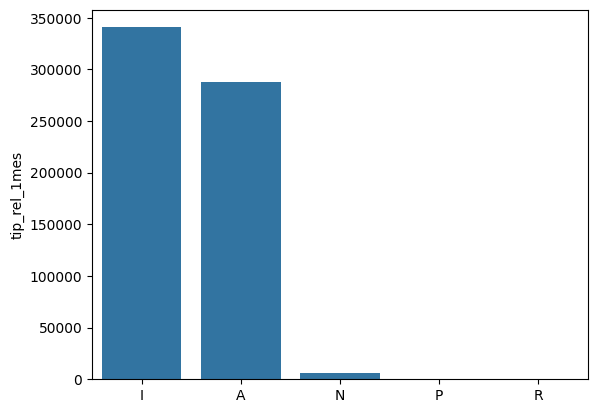

In [14]:
#Rellenamos nulos con una nueva categoria 'N'
data_unida['tip_rel_1mes'].fillna('N',inplace=True)
print(data_unida['tip_rel_1mes'].value_counts())
sns.barplot(data_unida['tip_rel_1mes'].value_counts())

In [15]:
dict(data_unida['des_canal'].value_counts())


{'KHE': 191157,
 'KAT': 152054,
 'KFC': 146716,
 'KHQ': 25773,
 'KFA': 18941,
 'KHK': 11218,
 'KHM': 7310,
 'KHD': 5456,
 'KHN': 4699,
 'KAS': 4072,
 'KAG': 3574,
 'RED': 3328,
 'KAB': 2984,
 'KAY': 2976,
 'KAA': 2931,
 'KCC': 2683,
 'KAE': 2441,
 'KHL': 2186,
 'KBZ': 2126,
 'KFD': 1844,
 'KAI': 1730,
 'KAZ': 1604,
 'KAF': 1583,
 'KAW': 1566,
 '013': 1501,
 'KEY': 1470,
 'KAR': 1338,
 'KCI': 1316,
 '007': 1255,
 'KAH': 1243,
 'KCH': 1102,
 'KAJ': 1091,
 'KHF': 959,
 'KAQ': 807,
 'KHC': 779,
 'KAP': 724,
 'KAM': 586,
 'KFP': 540,
 'KAD': 470,
 'KHO': 434,
 'KGX': 424,
 'KBH': 416,
 'KEJ': 416,
 'KAC': 415,
 'KFJ': 381,
 'KFT': 378,
 'KGV': 365,
 'KES': 331,
 'KDR': 325,
 'KAL': 322,
 'KCG': 294,
 'KFF': 262,
 'KFG': 260,
 'KFS': 244,
 'KEW': 244,
 'KAO': 234,
 'KCL': 220,
 'KBQ': 208,
 'KGY': 206,
 'KBU': 202,
 'KBO': 200,
 'KFU': 178,
 'KDT': 174,
 'KDU': 166,
 'KCM': 162,
 'KEG': 160,
 'KCB': 158,
 'KBF': 156,
 'KEN': 156,
 'KFK': 150,
 'KFH': 150,
 'KED': 138,
 'KCD': 136,
 'KFN': 13

In [16]:
data_unida['id_segmento'].value_counts()

02 - PARTICULARES     369955
03 - UNIVERSITARIO    230740
01 - TOP               26584
Name: id_segmento, dtype: int64

In [17]:
data_unida['mean_engagement'].median()

6.463518112854217

In [18]:
data_unida['imp_renta'].median()

101290.515

<Axes: ylabel='imp_renta'>

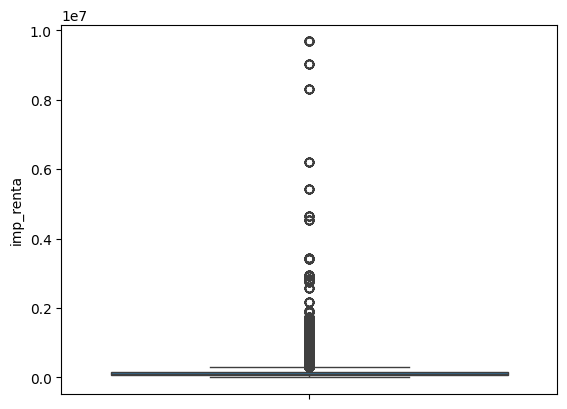

In [19]:
sns.boxplot(data_unida[data_unida['imp_renta']<1e7]['imp_renta'])

<Axes: xlabel='imp_renta', ylabel='Count'>

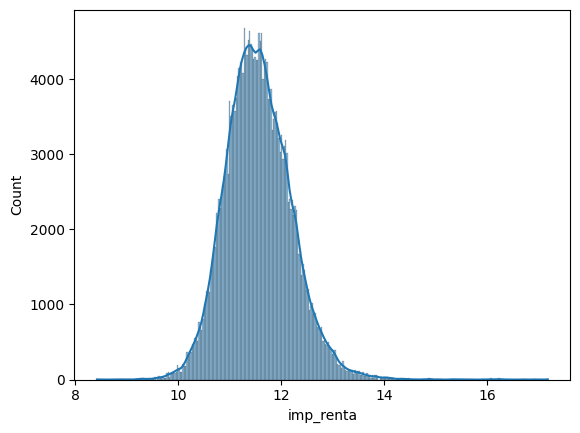

In [20]:
sns.histplot(np.log(data['imp_renta']),kde=True)

In [21]:
#Para la columna imprenta transformamos con logaritmo para converitr a distibucion normal e imputamos con la media
data_unida['imp_renta']=np.log(data_unida['imp_renta'])
imp_imputer=SimpleImputer(strategy='mean')
data_unida['imp_renta']=imp_imputer.fit_transform(data_unida[['imp_renta']])

<Axes: ylabel='id_segmento'>

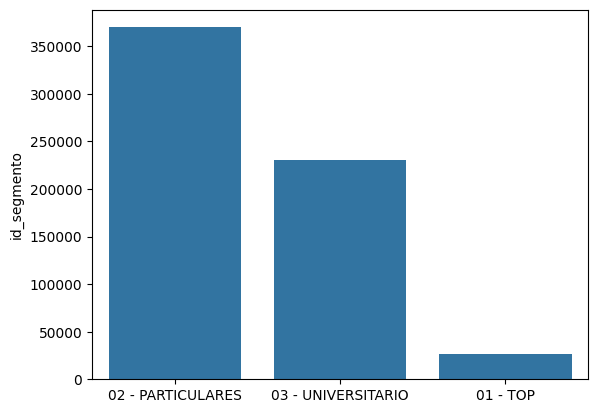

In [22]:
sns.barplot(data_unida['id_segmento'].value_counts())

In [23]:
#Creamos una nueva categoria '04-NO TIENE' para la columna id_segmento
data_unida['id_segmento'].fillna('04-NO TIENE',inplace=True)

In [24]:
data_unida['mean_engagement'].describe()

count    629040.000000
mean          6.425623
std           1.345879
min           0.218520
25%           5.117500
50%           6.463518
75%           7.359949
max          38.793123
Name: mean_engagement, dtype: float64

<Axes: xlabel='mean_engagement', ylabel='Count'>

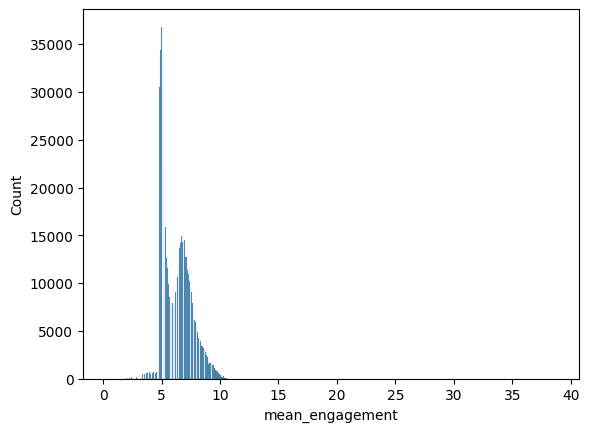

In [25]:
sns.histplot(data_unida['mean_engagement'])

<Axes: ylabel='mean_engagement'>

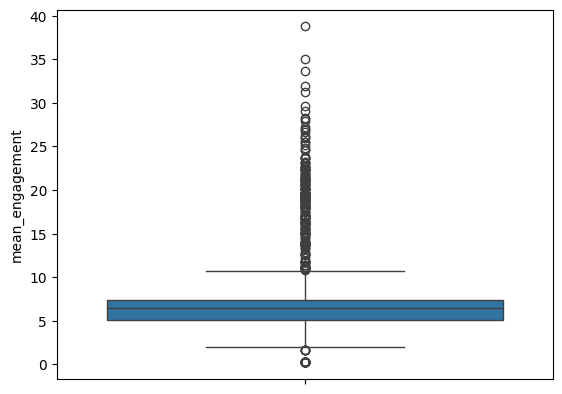

In [26]:
sns.boxplot(data_unida['mean_engagement'])

In [27]:
#Rellenamos con mediana, no tenemos informacion para eliminar outliers

eng_imputer=SimpleImputer(strategy='median')
data_unida['mean_engagement']=eng_imputer.fit_transform(data_unida[['mean_engagement']])

In [28]:
data_unida.isna().sum()

cod_persona                 0
mes                         0
pais                        0
sexo                        0
edad                        0
fecha1                     56
xti_empleado               56
xti_nuevo_cliente          56
num_antiguedad              0
xti_rel                    56
tip_rel_1mes                0
indresi                    56
indext                     56
des_canal                7178
xti_extra                  56
tip_dom                    56
cod_provincia               0
xti_actividad_cliente      56
imp_renta                   0
id_segmento                 0
mean_engagement             0
ind_prod1                   0
ind_prod2                   0
ind_prod3                   0
ind_prod4                   0
ind_prod5                   0
ind_prod6                   0
ind_prod7                   0
ind_prod8                   0
ind_prod9                   0
ind_prod10                  0
ind_prod11                  0
ind_prod12                  0
ind_prod13

In [29]:
#Rellenamos los valores de los productos con el valor anterior
data_unida['ind_prod22'] = data_unida['ind_prod22'].fillna(method='ffill')
data_unida['ind_prod23'] = data_unida['ind_prod23'].fillna(method='ffill')

In [30]:
data_unida_cluster=data_unida.copy()

In [31]:
data_unida_cluster=data_unida_cluster[~data_unida_cluster['xti_rel'].isna()]
data_unida_cluster.drop('des_canal',axis=1,inplace=True)

In [32]:
data_unida_cluster.isna().sum()

cod_persona              0
mes                      0
pais                     0
sexo                     0
edad                     0
fecha1                   0
xti_empleado             0
xti_nuevo_cliente        0
num_antiguedad           0
xti_rel                  0
tip_rel_1mes             0
indresi                  0
indext                   0
xti_extra                0
tip_dom                  0
cod_provincia            0
xti_actividad_cliente    0
imp_renta                0
id_segmento              0
mean_engagement          0
ind_prod1                0
ind_prod2                0
ind_prod3                0
ind_prod4                0
ind_prod5                0
ind_prod6                0
ind_prod7                0
ind_prod8                0
ind_prod9                0
ind_prod10               0
ind_prod11               0
ind_prod12               0
ind_prod13               0
ind_prod14               0
ind_prod15               0
ind_prod16               0
ind_prod17               0
i

# **CLUSTERING**
---

Hacemos clustering para tratar de sacar los valores nulos de la columna des_canal, asignando valores comunes a usuarios de clusters similares

#### **Método del codo**

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
label_encoder = OrdinalEncoder()
data_unida_cluster['edad']=data_unida_cluster['edad'].astype(int)
data_unida_cluster.drop(['mes','fecha1'],axis=1,inplace=True)

In [34]:
data_unida_cluster['num_antiguedad']=data_unida_cluster['num_antiguedad'].astype(int)
cat_cols=data_unida_cluster.select_dtypes(include='O').columns

In [35]:
data_unida_cluster[cat_cols] = label_encoder.fit_transform(data_unida_cluster[cat_cols])

Para k = 2 , el coste (SSE)= 804930154.2697054
Para k = 3 , el coste (SSE)= 489408207.3725257
Para k = 4 , el coste (SSE)= 408867366.6602143
Para k = 5 , el coste (SSE)= 363939586.5191379
Para k = 6 , el coste (SSE)= 303398693.97112983
Para k = 7 , el coste (SSE)= 286667022.5301326
Para k = 8 , el coste (SSE)= 259194894.77028787
Para k = 9 , el coste (SSE)= 243107750.0589313
Para k = 10 , el coste (SSE)= 226250743.41200694


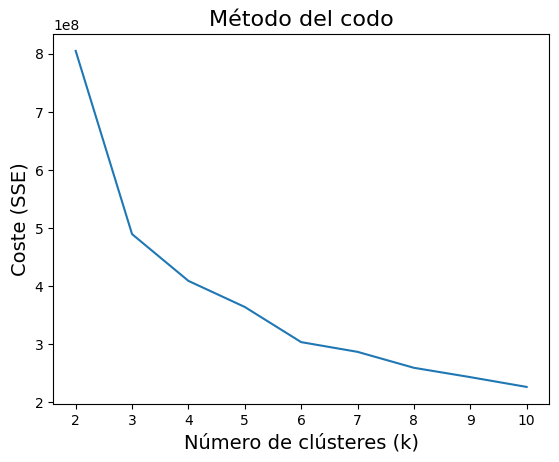

In [37]:
data_cluster=data_unida_cluster.iloc[:,:18]
data_cluster.drop('cod_persona',axis=1,inplace=True)
# Aplicar LabelEncoder a la columna 'colores'
# definimos la n-tupla donde ordenaderemos los sucesivos valores de SSE
# hallados para cada valor de k
Coste = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para el cálculo de la función de coste (SSE) desde k= 2 hasta k= 10
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100).fit(data_cluster)
    print(
        "Para k =",
        num,
        ', el coste (SSE)=',
        kmeans.inertia_,
    )
    Coste.append(kmeans.inertia_)

fig, ax = plt.subplots()
ax.set_title('Método del codo', fontsize = 16)
ax.set_ylabel("Coste (SSE)",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
ax.plot(krange,Coste)
plt.show()

In [38]:
from sklearn.metrics import silhouette_samples,silhouette_score
#Importamos librerías específicas para este análsis de Silhouette
#Se ha adaptado el código https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm

In [39]:

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data_unida_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_unida_cluster, cluster_labels)
    print(
        "Para k =",
        n_clusters,
        ", S =",
        silhouette_avg,
    )


KeyboardInterrupt: 

In [83]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

for k in [2,3,4,5,6]:
    kmeans = KMeans(n_clusters=k, n_init= 'auto', random_state=10, max_iter=3000)
    Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
    data_cluster['id_cluster']=kmeans.labels_
    muestra=data_cluster.sample(round(0.1*len(data_cluster)))
    silhouette_avg = silhouette_score(muestra.drop('id_cluster',axis=1),muestra['id_cluster'])
    cal=calinski_harabasz_score(muestra.drop('id_cluster',axis=1),muestra['id_cluster'])
    print('\nPara un Nº de clusters: ',k ,
          '\nS: ',silhouette_avg,
          '\nCH: ',cal)
    print('-'*50)


Para un Nº de clusters:  2 
S:  0.6272700442992624 
CH:  181695.68638785311
--------------------------------------------------

Para un Nº de clusters:  3 
S:  0.5378586367102064 
CH:  170013.12538405813
--------------------------------------------------

Para un Nº de clusters:  4 
S:  0.4783082596584503 
CH:  139254.95730110045
--------------------------------------------------

Para un Nº de clusters:  5 
S:  0.33385565774821924 
CH:  130331.34943278968
--------------------------------------------------

Para un Nº de clusters:  6 
S:  0.3098814545512509 
CH:  117743.12086581739
--------------------------------------------------


[1 1 1 ... 0 0 0]


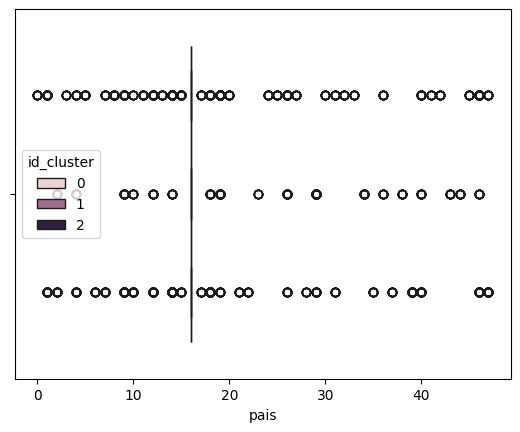

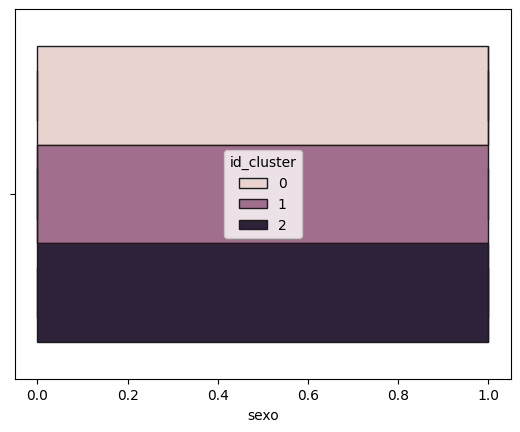

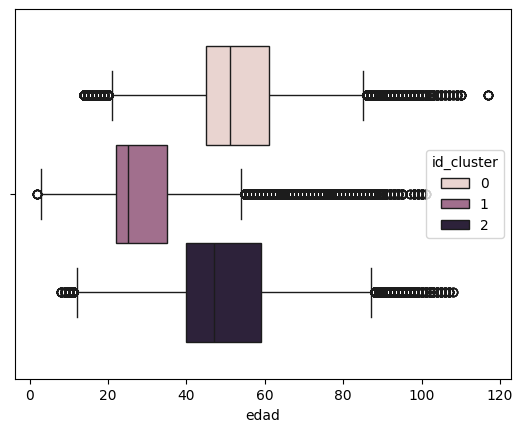

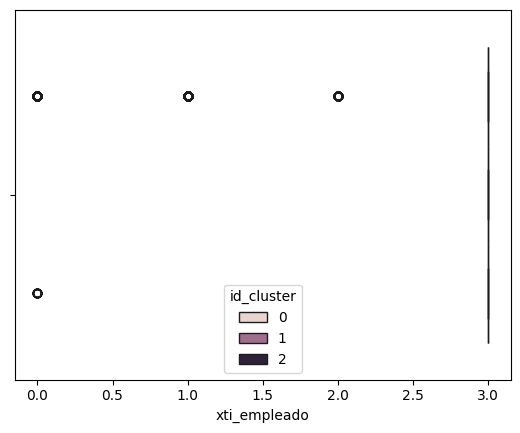

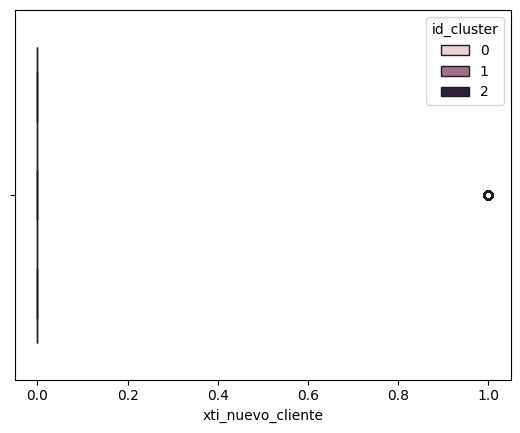

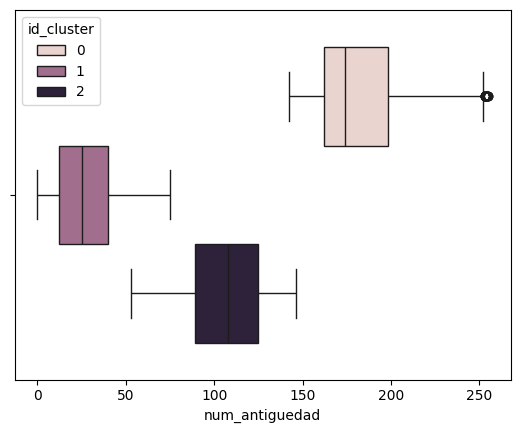

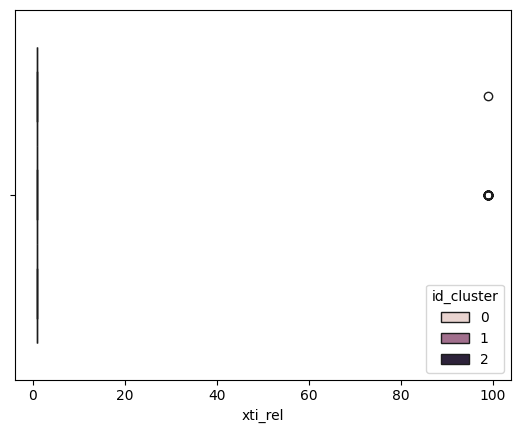

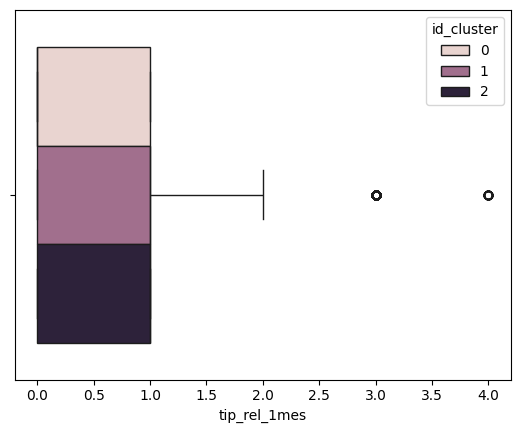

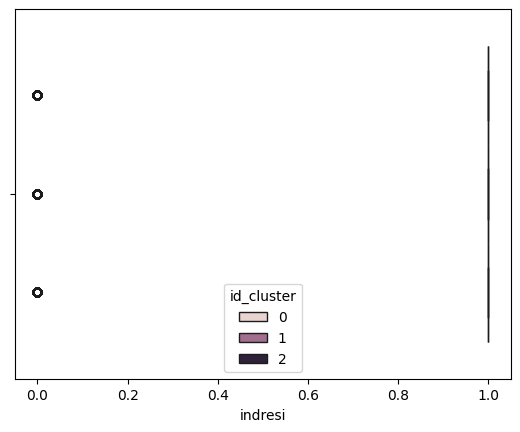

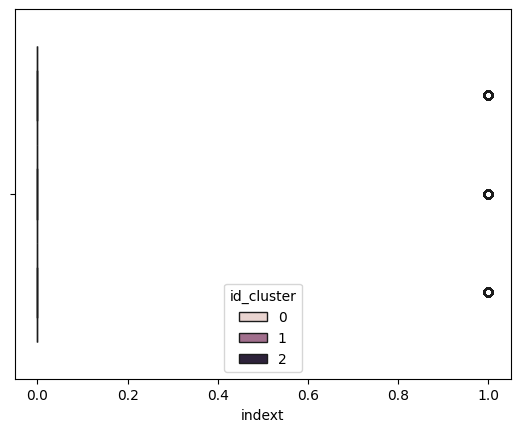

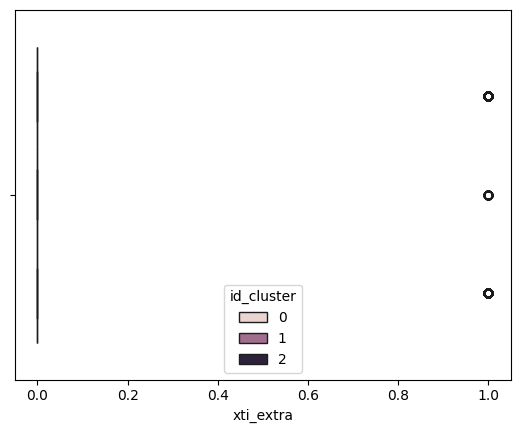

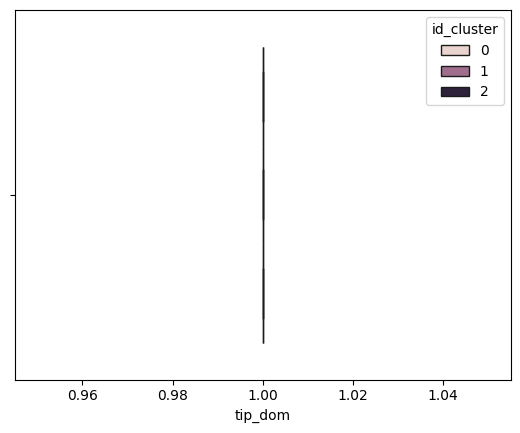

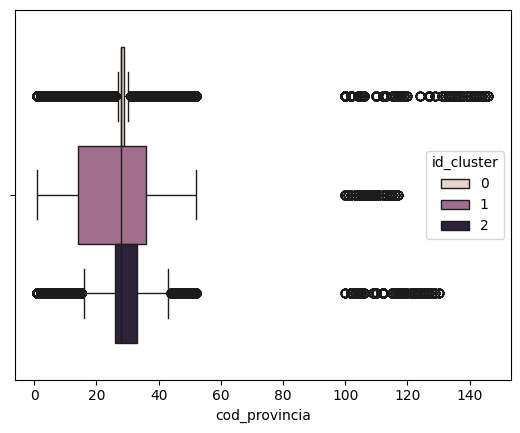

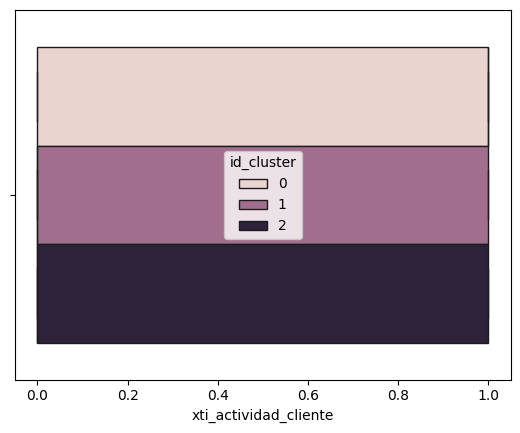

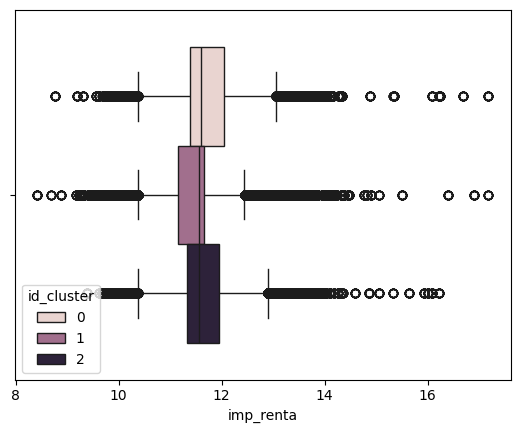

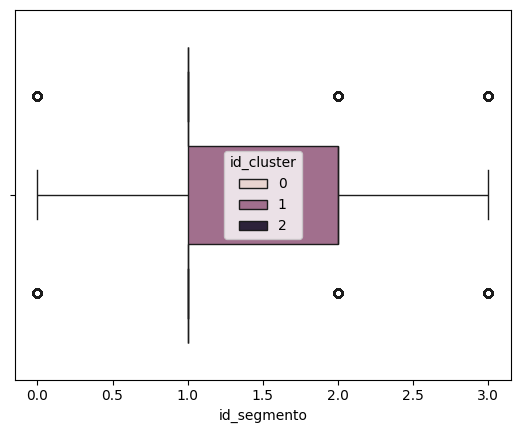

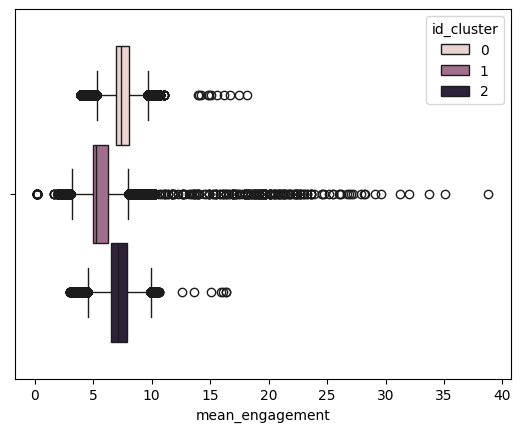

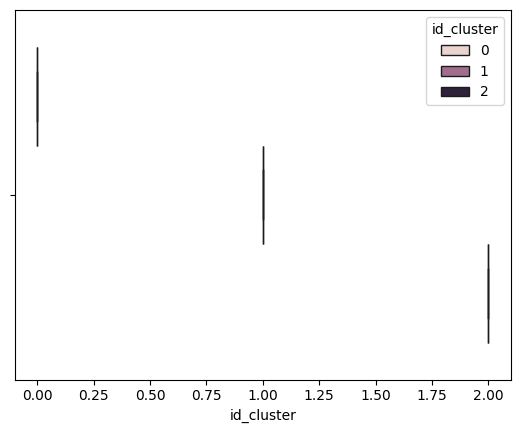

In [38]:
k_val=3
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
print(Y_pred)
kmeans.labels_
data_cluster['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_cluster.columns:
    sns.boxplot(data_cluster,x=col,hue='id_cluster')
    plt.show()

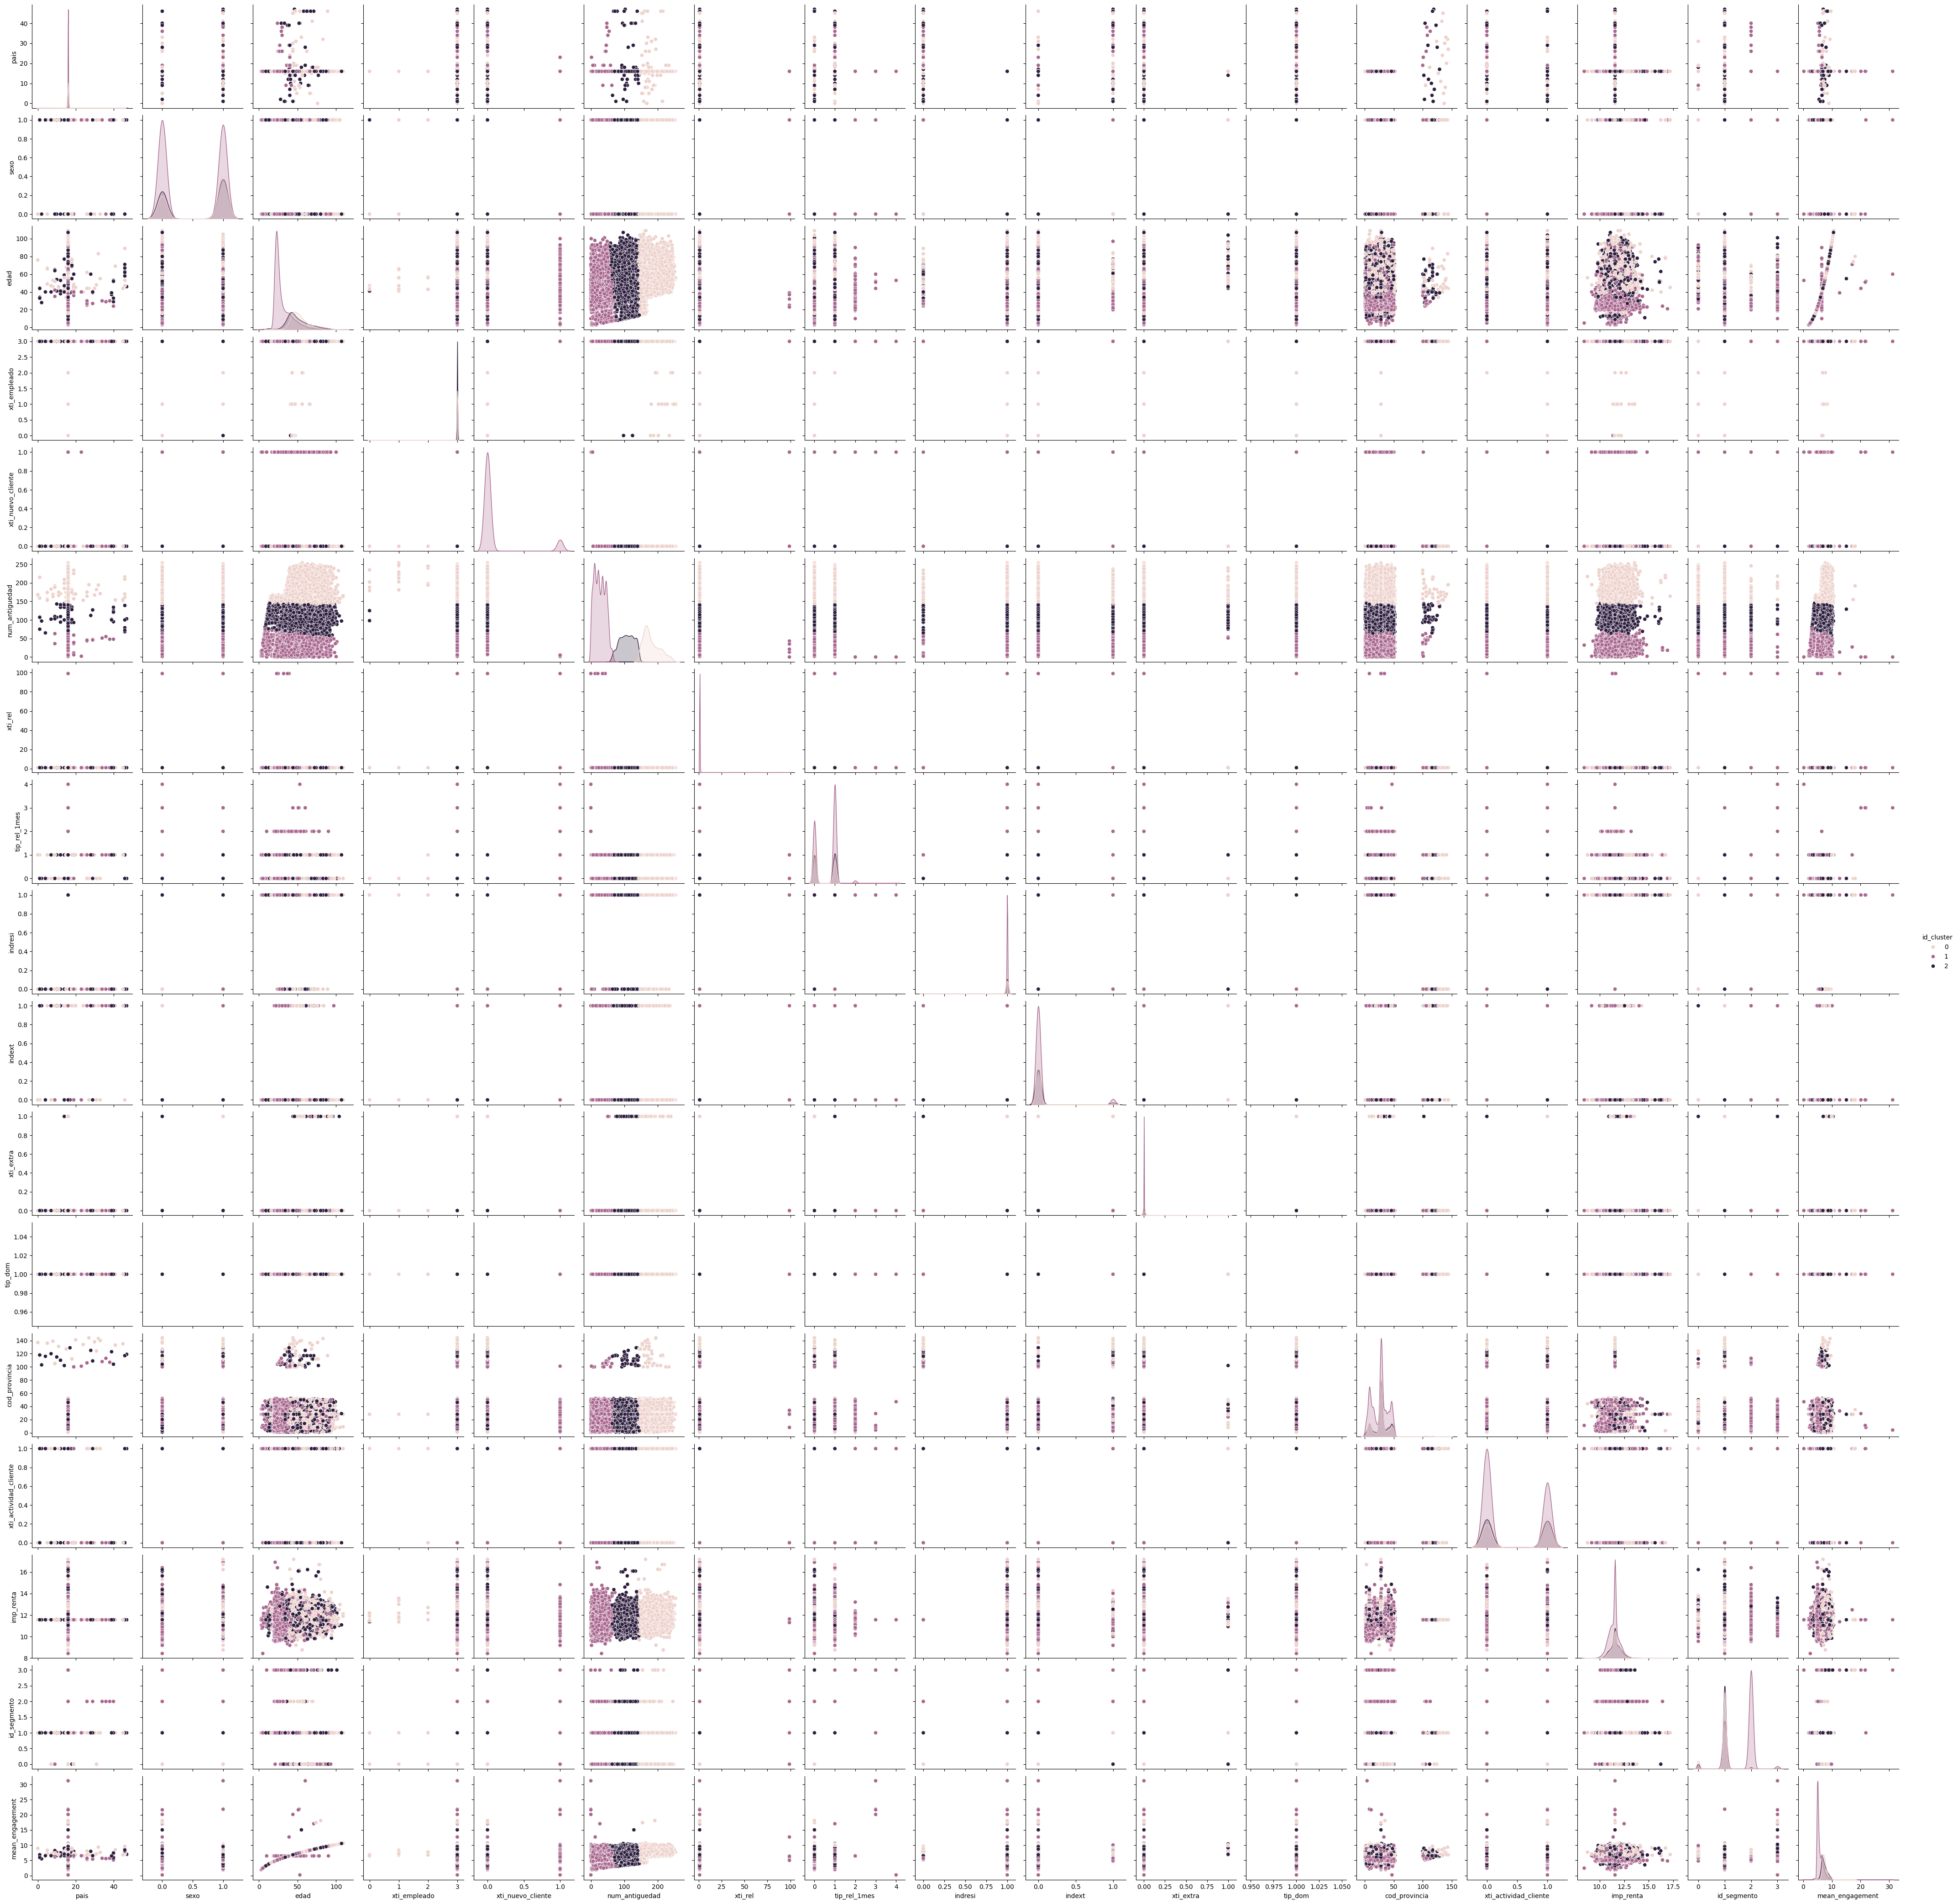

In [39]:
#gráfico pairplot sobre una submuestra
muestra=data_cluster.sample(round(0.05*len(data_cluster)))
sns.pairplot(muestra,hue='id_cluster')

Una vez validado el clustering donde k=3 consideramos es la mejor opcion, añadimos los ids de cluster a nuestro dataset.

In [40]:
data_unida['id_cluster']=data_cluster['id_cluster'].copy()

<Axes: ylabel='id_cluster'>

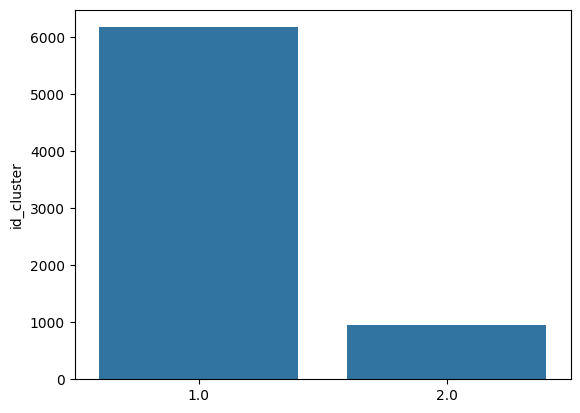

In [41]:
sns.barplot(data_unida[data_unida['des_canal'].isna()]['id_cluster'].value_counts())

In [50]:
#Aplicamos el valor mas común de des_canal para cada cluster
map_des_canal={}
for i in data_unida['id_cluster'].dropna().unique():
    map_des_canal[i]=data_unida[data_unida['id_cluster']==i]['des_canal'].mode()[0]
map_des_canal

{1.0: 'KHE', 2.0: 'KFC', 0.0: 'KAT'}

In [54]:
data_des_canal_nan=data_unida.loc[data_unida['des_canal'].isna()]
data_des_canal_nan['des_canal']=data_des_canal_nan['id_cluster'].map(map_des_canal)

/var/folders/4f/gbmqzwn51yg8gh7yyxzgpcl80000gn/T/ipykernel_84526/2123610451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_des_canal_nan['des_canal']=data_des_canal_nan['id_cluster'].map(map_des_canal)


In [57]:
data_unida.loc[data_unida['des_canal'].isna()]=data_des_canal_nan

Tras este proceso ya habríamos eliminado los nulos en la columna des_canal

# **56 DATOS NULOS RECURRENTES**
---

In [59]:
data_unida.isna().sum()

cod_persona               0
mes                       0
pais                      0
sexo                      0
edad                      0
fecha1                   56
xti_empleado             56
xti_nuevo_cliente        56
num_antiguedad            0
xti_rel                  56
tip_rel_1mes              0
indresi                  56
indext                   56
des_canal                56
xti_extra                56
tip_dom                  56
cod_provincia             0
xti_actividad_cliente    56
imp_renta                 0
id_segmento               0
mean_engagement           0
ind_prod1                 0
ind_prod2                 0
ind_prod3                 0
ind_prod4                 0
ind_prod5                 0
ind_prod6                 0
ind_prod7                 0
ind_prod8                 0
ind_prod9                 0
ind_prod10                0
ind_prod11                0
ind_prod12                0
ind_prod13                0
ind_prod14                0
ind_prod15          

# **Guardamos el dataset limpio**
---

In [67]:
data_unida.drop('id_cluster',axis=1,inplace=True)
parte_1_limpia=data_unida.iloc[:round(len(data_unida)/3),:]
parte_2_limpia=data_unida.iloc[round(len(data_unida)/3):2*round(len(data_unida)/3),:]
parte_3_limpia=data_unida.iloc[2*round(len(data_unida)/3):,:]
parte_1_limpia.shape
parte_2_limpia.shape
parte_3_limpia.shape

(211560, 46)

In [68]:
parte_1_limpia.to_csv('../../Data/Limpio/dataset_limpio_parte1.csv',index=False)
parte_2_limpia.to_csv('../../Data/Limpio/dataset_limpio_parte2.csv',index=False)
parte_3_limpia.to_csv('../../Data/Limpio/dataset_limpio_parte3.csv',index=False)